In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [81]:
file_path = r"C:\Users\User\Desktop\expedia_clean_dfs\last_output_df_25_06_2024.csv"
expedia_df = pd.read_csv(file_path)

In [82]:
expedia_df.head()

,Snapshot,start_date,end_dateIndex,name,TTT,LOS,score,reviews,price_per_night,original_price,...,No_payment,Breakfast,Option Member,end_date,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category
0,2024-06-25 10:55:16.879300,2024-06-26,NaN,Penny Williamsburg,1.0,1.0,9.69,505,369.0,419.0,...,False,False,False,2024-06-27,0.0,NaN,NaN,NaN,NaN,NaN
1,2024-06-25 10:55:16.927115,2024-06-26,NaN,"voco Fiorello - LaGuardia East, an IHG Hotel",1.0,1.0,8.48,248,242.0,269.0,...,False,False,False,2024-06-27,1.0,NaN,NaN,NaN,NaN,NaN
2,2024-06-25 10:55:16.958119,2024-06-26,NaN,Best Western Queens Gold Coast,1.0,1.0,8.08,1007,227.0,0.0,...,False,False,False,2024-06-27,2.0,NaN,NaN,NaN,NaN,NaN
3,2024-06-25 10:55:16.973079,2024-06-26,NaN,"PUBLIC, an Ian Schrager hotel",1.0,1.0,8.28,2618,549.0,0.0,...,False,False,True,2024-06-27,3.0,NaN,NaN,NaN,NaN,NaN
4,2024-06-25 10:55:16.985049,2024-06-26,NaN,Radio Hotel,1.0,1.0,8.68,1727,194.0,215.0,...,False,False,False,2024-06-27,4.0,4.0,NaN,Washington Heights,9.8,Uptown Manhattan


In [83]:
expedia_df.head()

,Snapshot,start_date,end_dateIndex,name,TTT,LOS,score,reviews,price_per_night,original_price,...,No_payment,Breakfast,Option Member,end_date,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category
0,2024-06-25 10:55:16.879300,2024-06-26,NaN,Penny Williamsburg,1.0,1.0,9.69,505,369.0,419.0,...,False,False,False,2024-06-27,0.0,NaN,NaN,NaN,NaN,NaN
1,2024-06-25 10:55:16.927115,2024-06-26,NaN,"voco Fiorello - LaGuardia East, an IHG Hotel",1.0,1.0,8.48,248,242.0,269.0,...,False,False,False,2024-06-27,1.0,NaN,NaN,NaN,NaN,NaN
2,2024-06-25 10:55:16.958119,2024-06-26,NaN,Best Western Queens Gold Coast,1.0,1.0,8.08,1007,227.0,0.0,...,False,False,False,2024-06-27,2.0,NaN,NaN,NaN,NaN,NaN
3,2024-06-25 10:55:16.973079,2024-06-26,NaN,"PUBLIC, an Ian Schrager hotel",1.0,1.0,8.28,2618,549.0,0.0,...,False,False,True,2024-06-27,3.0,NaN,NaN,NaN,NaN,NaN
4,2024-06-25 10:55:16.985049,2024-06-26,NaN,Radio Hotel,1.0,1.0,8.68,1727,194.0,215.0,...,False,False,False,2024-06-27,4.0,4.0,NaN,Washington Heights,9.8,Uptown Manhattan


In [84]:
def remove_exceptions(df):
...     # Ensure the price column is treated as a string, remove non-numeric characters, and handle empty strings
...     # df['price_per_night'] = df['price_per_night'].astype(str).str.replace(r'\D', '', regex=True)
... 
...     # Replace empty strings with NaN
...     df['price_per_night'].replace('', np.nan, inplace=True)
... 
...     # Drop rows with NaN values in the price_per_night column
...     df.dropna(subset=['price_per_night'], inplace=True)
... 
...     # Convert the price_per_night column to float
...     df['price_per_night'] = df['price_per_night'].astype(float)
... 
...     # Calculate Q1 (25th percentile) and Q3 (75th percentile)
...     Q1 = df['price_per_night'].quantile(0.25)
...     Q3 = df['price_per_night'].quantile(0.75)
... 
...     # Calculate the IQR (Interquartile Range)
...     IQR = Q3 - Q1
... 
...     # Determine the lower and upper bounds for outliers
...     lower_bound = Q1 - 1.5 * IQR
...     upper_bound = Q3 + 1.5 * IQR
... 
...     # Remove outliers
...     df_no_outliers = df[(df['price_per_night'] >= lower_bound) & (df['price_per_night'] <= upper_bound)]
... 
...     print(f"Original DataFrame shape: {df.shape}")
...     print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")
...     
...     return df_no_outliers

In [85]:
expedia_df = remove_exceptions(expedia_df)

Original DataFrame shape: (22006, 23)
DataFrame shape after removing outliers: (20555, 23)


In [86]:
def create_vizual(df):
    # Ensure the reviews column is treated as a string and clean it
    df['reviews'] = df['reviews'].astype(str).str.replace(r'\D', '', regex=True)
    df['reviews'] = df['reviews'].replace('', '0').astype(int)  # Replace empty strings with '0' and convert to int
    # Clean the necessary columns
    df['score'] = df['score'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    df['price_per_night'] = df['price_per_night'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    df['price_per_night'] = df['price_per_night'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
    # Create a DataFrame where each hotel appears only once
    df_unique_hotels = df.drop_duplicates(subset='name')
    # Plot distributions using Matplotlib for unique hotels
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    # Number of reviews distribution
    axs[0].hist(df_unique_hotels['reviews'], bins=50, color='skyblue', edgecolor='black')
    axs[0].set_title('Distribution of Number of Reviews')
    axs[0].set_xlabel('Number of Reviews')
    axs[0].set_ylabel('Frequency')
    # Hotel score distribution
    axs[1].hist(df_unique_hotels['score'], bins=50, color='salmon', edgecolor='black')
    axs[1].set_title('Distribution of Hotel Scores')
    axs[1].set_xlabel('Hotel Score')
    axs[1].set_ylabel('Frequency')
    # Price per night distribution
    axs[2].hist(df['price_per_night'], bins=50, color='lightgreen', edgecolor='black')
    axs[2].set_title('Distribution of Prices per Night')
    axs[2].set_xlabel('Price per Night')
    axs[2].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    # Plot distributions using Seaborn for unique hotels
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    # Number of reviews distribution
    sns.histplot(df_unique_hotels['reviews'], bins=50, kde=True, ax=axs[0], color='skyblue')
    axs[0].set_title('Distribution of Number of Reviews')
    axs[0].set_xlabel('Number of Reviews')
    axs[0].set_ylabel('Frequency')
    # Hotel score distribution
    sns.histplot(df_unique_hotels['score'], bins=50, kde=True, ax=axs[1], color='salmon')
    axs[1].set_title('Distribution of Hotel Scores')
    axs[1].set_xlabel('Hotel Score')
    axs[1].set_ylabel('Frequency')
    # Price per night distribution
    sns.histplot(df['price_per_night'], bins=50, kde=True, ax=axs[2], color='lightgreen')
    axs[2].set_title('Distribution of Prices per Night')
    axs[2].set_xlabel('Price per Night')
    axs[2].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

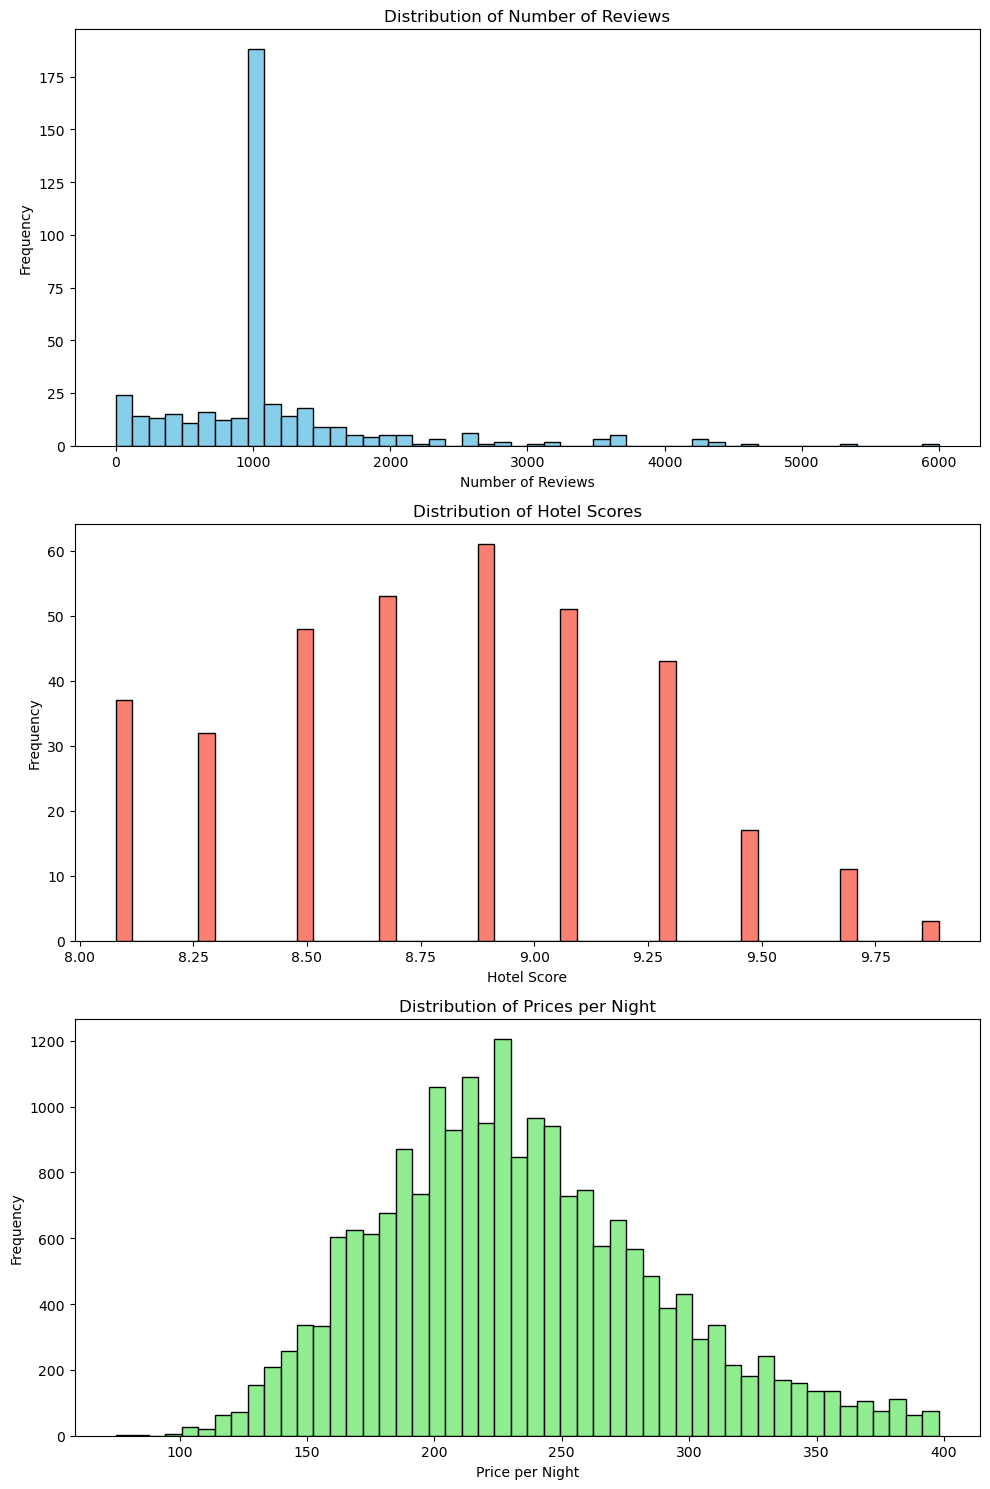

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


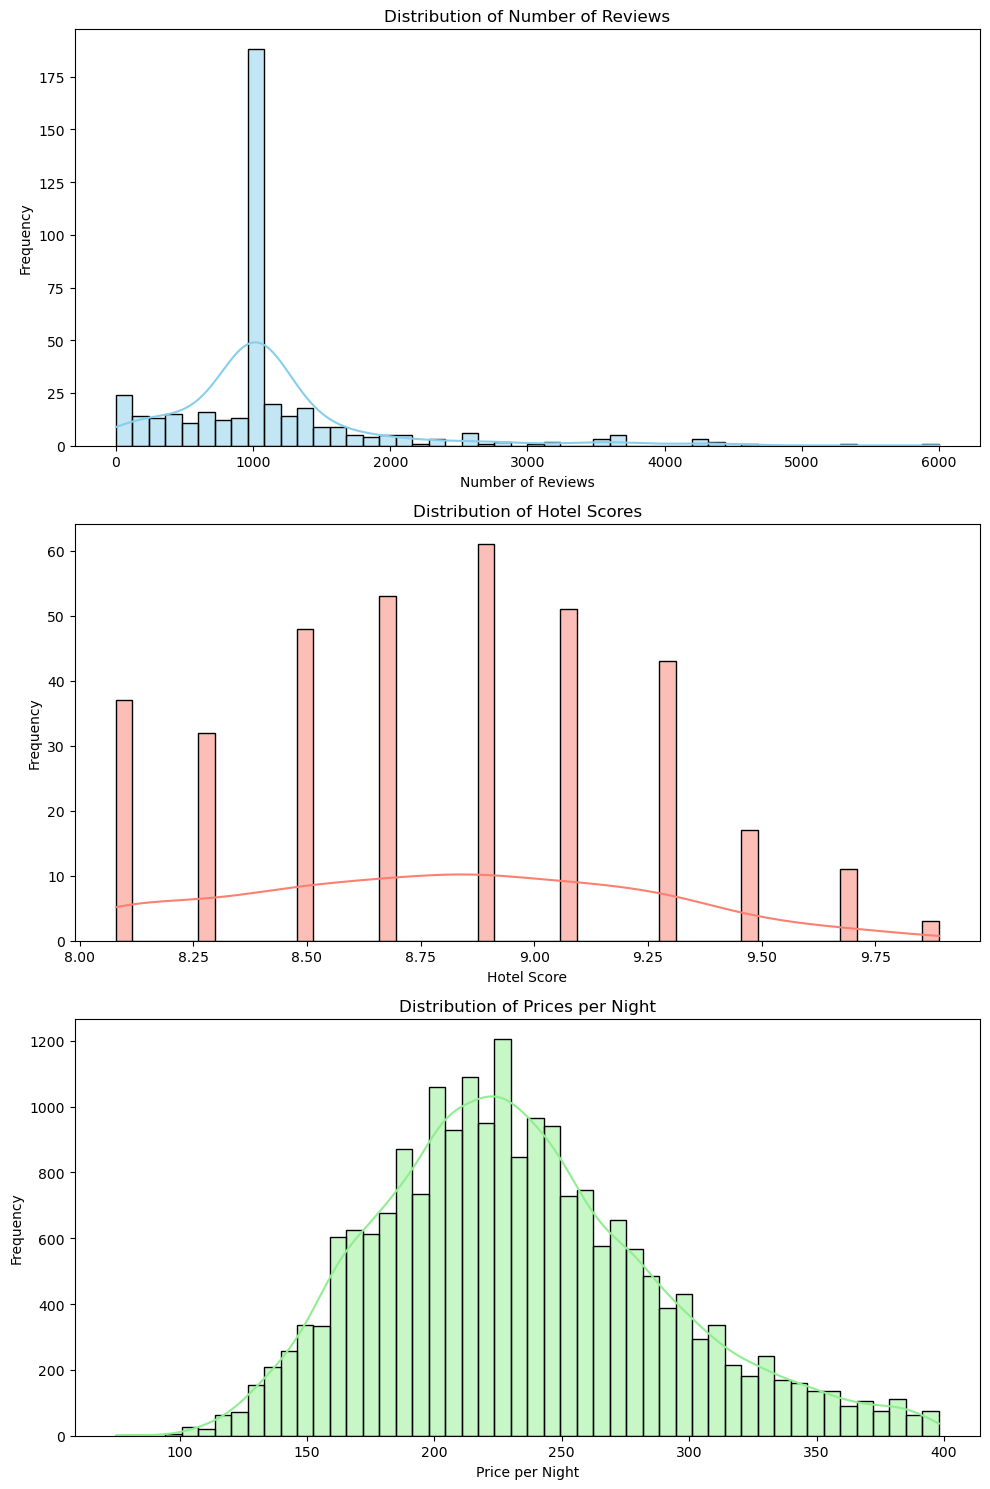

In [87]:
create_vizual(expedia_df)

In [88]:
expedia_df["price_per_night"]

0        369.0
1        242.0
2        227.0
4        194.0
5        174.0
         ...  
21999    197.0
22000    206.0
22002    255.0
22003    268.0
22004    168.0
Name: price_per_night, Length: 20555, dtype: float64

In [89]:
booking_df = pd.read_csv(r"C:\Users\User\Downloads\20_06_hotels_data_cleaned.csv")

In [90]:
booking_df

,name,location,score,reviews,room_type,bed_type,price,availability,url,star_rating,...,Limited_rooms,TTT,Breakfast,index,neighborhood,km_from_center,LOS,price_per_night,room_rate,neighborhood_category
0,U.S. Pacific Hotel,NaN,5.6,2437.0,Standard Double (No Window),New YorkShow on map5.7 km from centreMetro ac...,129.0,"1 night, 2 adults",https://www.booking.com/hotel/us/us-pacific.en...,1.0,...,4,1,0,1,Chinatown,5.70,1,129.0,1,Downtown Manhattan
1,Hudson Yard 408,NaN,4.9,42.0,Double Room,New YorkShow on map1.9 km from centreMetro ac...,158.0,"1 night, 2 adults",https://www.booking.com/hotel/us/hudson-new-yo...,NaN,...,2,1,0,2,Hudson Yards,1.90,1,158.0,1,Midtown Manhattan
2,Carlton Arms Hotel,NaN,7.4,1978.0,Double Room with Shared Bathroom,New YorkShow on map3.1 km from centreMetro ac...,161.0,"1 night, 2 adults",https://www.booking.com/hotel/us/carlton-arms....,2.0,...,3,1,0,3,Gramercy,3.10,1,161.0,1,Midtown Manhattan
3,Bowery Grand Hotel,NaN,3.5,1406.0,Standard Single Room with Shared Bathroom,New YorkShow on map5.6 km from centreMetro ac...,189.0,"1 night, 2 adults",https://www.booking.com/hotel/us/bowery-grand....,1.0,...,0,1,0,4,Lower East Side,5.60,1,189.0,1,Downtown Manhattan
4,West Side YMCA,NaN,6.6,13556.0,Bunk Bed Room with Shared Bathroom,New YorkShow on map350 m from centreMetro access,169.0,"1 night, 2 adults",https://www.booking.com/hotel/us/west-side-ymc...,3.0,...,5,1,0,5,Upper West Side,0.35,1,169.0,0,Uptown Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23678,Fairfield Inn & Suites by Marriott New York Ma...,NaN,8.2,6793.0,1 King Bed,New YorkShow on map1.9 km from centreMetro ac...,1506.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/fairfield-inn...,4.0,...,5,30,1,165,Hell's Kitchen,1.90,5,301.2,3,Midtown Manhattan
23679,Freehand New York,NaN,7.8,1877.0,Premium Queen,New YorkShow on map3.1 km from centreMetro ac...,1511.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/freehand-new-...,4.0,...,0,30,0,166,Gramercy,3.10,5,302.2,2,Midtown Manhattan
23680,American Dream Guest House,NaN,9.0,4.0,Double Room with Shared Bathroom,New YorkShow on map1.1 km from centre,1511.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/american-drea...,NaN,...,1,30,0,167,Hell's Kitchen,1.10,5,302.2,1,Midtown Manhattan
23681,Courtyard by Marriott Times Square West,NaN,8.2,2796.0,King Room,New YorkShow on map1.8 km from centreMetro ac...,1514.0,"5 nights, 2 adults",https://www.booking.com/hotel/us/new-york-manh...,3.0,...,5,30,0,168,Hell's Kitchen,1.80,5,302.8,3,Midtown Manhattan


In [91]:
expedia_shared_hotels = expedia_df[expedia_df["name"].isin(booking_df["name"].unique().tolist())]

In [92]:
print(f"amount of shared hotels between expedia and booking: {len(expedia_shared_hotels['name'].unique())}")

amount of shared hotels between expedia and booking: 191


In [93]:
expedia_shared_hotels

,Snapshot,start_date,end_dateIndex,name,TTT,LOS,score,reviews,price_per_night,original_price,...,No_payment,Breakfast,Option Member,end_date,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category
4,2024-06-25 10:55:16.985049,2024-06-26,NaN,Radio Hotel,1.0,1.0,8.68,1727,194.0,215.0,...,False,False,False,2024-06-27,4.0,4.0,NaN,Washington Heights,9.8,Uptown Manhattan
10,2024-06-25 10:55:17.063838,2024-06-26,NaN,YOTEL New York Times Square,1.0,1.0,NaN,2334,260.0,289.0,...,False,False,False,2024-06-27,10.0,4.0,NaN,Hell's Kitchen,1.5,Midtown Manhattan
14,2024-06-25 10:55:17.112707,2024-06-26,NaN,City Club Hotel,1.0,1.0,NaN,1353,280.0,329.0,...,False,False,False,2024-06-27,14.0,4.0,NaN,Manhattan,1.4,Other Manhattan
16,2024-06-25 10:55:17.136644,2024-06-26,NaN,Hyatt Place New York City/Times Square,1.0,1.0,8.08,1511,351.0,390.0,...,False,False,False,2024-06-27,16.0,4.0,NaN,Hell's Kitchen,1.7,Midtown Manhattan
17,2024-06-25 10:55:17.147609,2024-06-26,NaN,The Flat NYC,1.0,1.0,8.68,279,238.0,298.0,...,False,False,False,2024-06-27,17.0,3.0,9.5,Flatiron District,2.9,Downtown Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21992,2024-06-25 12:42:19.070651,2024-07-25,NaN,Eurostars Wall Street,30.0,5.0,NaN,1001,179.0,199.0,...,False,False,False,2024-07-30,237.0,4.0,NaN,Manhattan,7.3,Other Manhattan
21997,2024-06-25 12:42:19.214072,2024-07-25,NaN,The Maritime Hotel,30.0,5.0,9.49,1015,311.0,359.0,...,False,False,False,2024-07-30,242.0,4.0,9.6,Chelsea,3.4,Midtown Manhattan
21999,2024-06-25 12:42:19.269889,2024-07-25,NaN,Doxie Hotel,30.0,5.0,NaN,760,197.0,0.0,...,False,False,False,2024-07-30,244.0,2.0,NaN,Manhattan,1.7,Other Manhattan
22003,2024-06-25 12:42:19.396702,2024-07-25,NaN,AC Hotel by Marriott New York Times Square,30.0,5.0,9.09,1001,268.0,0.0,...,False,False,False,2024-07-30,248.0,4.0,NaN,Manhattan,1.6,Other Manhattan


In [94]:
expedia_shared_hotels["neighborhood_category"] = None

C:\Users\User\AppData\Local\Temp\ipykernel_15700\3508631449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expedia_shared_hotels["neighborhood_category"] = None


In [95]:
expedia_shared_hotels = expedia_shared_hotels.drop("neighborhood_category", axis=1)

In [96]:
booking_unique_hotels_df = booking_df[['name', 'neighborhood_category']].drop_duplicates(subset='name').reset_index(drop=True)

In [97]:
booking_unique_hotels_df

,name,neighborhood_category
0,U.S. Pacific Hotel,Downtown Manhattan
1,Hudson Yard 408,Midtown Manhattan
2,Carlton Arms Hotel,Midtown Manhattan
3,Bowery Grand Hotel,Downtown Manhattan
4,West Side YMCA,Uptown Manhattan
...,...,...
393,The Wallace Hotel,Uptown Manhattan
394,Hilton Club The Quin New York,Unknown/Other
395,New York City GuestHouse,Uptown Manhattan
396,Sonder Henri on 24,Downtown Manhattan


In [98]:
expedia_shared_hotels = expedia_shared_hotels.merge(booking_unique_hotels_df, on="name", how='left')

In [99]:
expedia_shared_hotels

,Snapshot,start_date,end_dateIndex,name,TTT,LOS,score,reviews,price_per_night,original_price,...,No_payment,Breakfast,Option Member,end_date,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category
0,2024-06-25 10:55:16.985049,2024-06-26,NaN,Radio Hotel,1.0,1.0,8.68,1727,194.0,215.0,...,False,False,False,2024-06-27,4.0,4.0,NaN,Washington Heights,9.8,Uptown Manhattan
1,2024-06-25 10:55:17.063838,2024-06-26,NaN,YOTEL New York Times Square,1.0,1.0,NaN,2334,260.0,289.0,...,False,False,False,2024-06-27,10.0,4.0,NaN,Hell's Kitchen,1.5,Midtown Manhattan
2,2024-06-25 10:55:17.112707,2024-06-26,NaN,City Club Hotel,1.0,1.0,NaN,1353,280.0,329.0,...,False,False,False,2024-06-27,14.0,4.0,NaN,Manhattan,1.4,Unknown/Other
3,2024-06-25 10:55:17.136644,2024-06-26,NaN,Hyatt Place New York City/Times Square,1.0,1.0,8.08,1511,351.0,390.0,...,False,False,False,2024-06-27,16.0,4.0,NaN,Hell's Kitchen,1.7,Midtown Manhattan
4,2024-06-25 10:55:17.147609,2024-06-26,NaN,The Flat NYC,1.0,1.0,8.68,279,238.0,298.0,...,False,False,False,2024-06-27,17.0,3.0,9.5,Flatiron District,2.9,Downtown Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10938,2024-06-25 12:42:19.070651,2024-07-25,NaN,Eurostars Wall Street,30.0,5.0,NaN,1001,179.0,199.0,...,False,False,False,2024-07-30,237.0,4.0,NaN,Manhattan,7.3,Unknown/Other
10939,2024-06-25 12:42:19.214072,2024-07-25,NaN,The Maritime Hotel,30.0,5.0,9.49,1015,311.0,359.0,...,False,False,False,2024-07-30,242.0,4.0,9.6,Chelsea,3.4,Midtown Manhattan
10940,2024-06-25 12:42:19.269889,2024-07-25,NaN,Doxie Hotel,30.0,5.0,NaN,760,197.0,0.0,...,False,False,False,2024-07-30,244.0,2.0,NaN,Manhattan,1.7,Unknown/Other
10941,2024-06-25 12:42:19.396702,2024-07-25,NaN,AC Hotel by Marriott New York Times Square,30.0,5.0,9.09,1001,268.0,0.0,...,False,False,False,2024-07-30,248.0,4.0,NaN,Manhattan,1.6,Unknown/Other


In [100]:
def find_correlations(df):
    # Drop 'location_rating' and 'price' columns if they exist
    df_temp = df.drop(columns=['location_rating', 'price'], errors='ignore')

    # Select only numeric columns
    numeric_df = df_temp.select_dtypes(include=[float, int])
    
    # Remove rows with null values in numeric columns
    numeric_df = numeric_df.dropna()
    
    # Verify the data types and the content of the dataframe
    print("Data Types in Numeric DataFrame:")
    print(numeric_df.dtypes)
    print("\nFirst Few Rows of Numeric DataFrame:")
    print(numeric_df.head())
    
    # Check if we have any numeric columns left after dropping NA values
    if numeric_df.empty:
        print("No numeric data available after preprocessing.")
    else:
        # Calculate the correlation matrix
        correlation_matrix = numeric_df.corr()
    
        # Display the correlation matrix
        print("Correlation Matrix:")
        print(correlation_matrix)
    
        # Visualize the correlation matrix using a heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Matrix Heatmap')
        plt.show()
    
        # Visualize the strong relationships
        # Identify strong correlations (e.g., correlation coefficient > 0.5 or < -0.5)
        strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)].stack().reset_index()
        strong_correlations = strong_correlations[strong_correlations['level_0'] != strong_correlations['level_1']]
        strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
    
        # Plot the relationships for strong correlations
        for _, row in strong_correlations.iterrows():
            feature1 = row['Feature 1']
            feature2 = row['Feature 2']
            correlation = row['Correlation']
            
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=numeric_df, x=feature1, y=feature2)
            plt.title(f'Scatter Plot between {feature1} and {feature2} (Correlation: {correlation:.2f})')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.show()
    
        # Specifically visualize the relationship between 'price_per_night' and other parameters
        if 'price_per_night' in numeric_df.columns:
            price_correlations = correlation_matrix['price_per_night'].sort_values(ascending=False)
            print("Price per Night Correlations:")
            print(price_correlations)
    
            # Plot the relationships for 'price_per_night'
            for feature in price_correlations.index:
                if feature != 'price_per_night':
                    plt.figure(figsize=(8, 6))
                    sns.scatterplot(data=numeric_df, x=feature, y='price_per_night')
                    plt.title(f'Scatter Plot between {feature} and price_per_night (Correlation: {price_correlations[feature]:.2f})')
                    plt.xlabel(feature)
                    plt.ylabel('price_per_night')
                    plt.show()
        else:
            print("Column 'price_per_night' not found in the numerical columns.")

In [101]:
find_correlations(expedia_shared_hotels)

Data Types in Numeric DataFrame:
end_dateIndex      float64
TTT                float64
LOS                float64
score              float64
reviews              int32
price_per_night    float64
original_price     float64
discount_perc      float64
Index              float64
star_rating        float64
km_from_center     float64
dtype: object

First Few Rows of Numeric DataFrame:
Empty DataFrame
Columns: [end_dateIndex, TTT, LOS, score, reviews, price_per_night, original_price, discount_perc, Index, star_rating, km_from_center]
Index: []
No numeric data available after preprocessing.


In [102]:
df_unique_hotels = expedia_df.drop_duplicates(subset='name')
# Count the number of unique neighborhoods
num_neighborhoods = df_unique_hotels['neighborhood'].nunique()
# Print the result
print(f'There are {num_neighborhoods} unique neighborhoods in the data.')


# Count the number of hotels in each neighborhood
hotels_per_neighborhood = expedia_df.groupby('neighborhood').size().reset_index(name='hotel_count')

# Print the result
print(hotels_per_neighborhood)

There are 21 unique neighborhoods in the data.
          neighborhood  hotel_count
0              Chelsea         1122
1            Chinatown          316
2          East Harlem            1
3         East Village           28
4    Flatiron District          100
5             Gramercy           61
6    Greenwich Village          141
7               Harlem           56
8       Hell's Kitchen         1245
9         Little Italy           68
10     Lower East Side          341
11           Manhattan         4601
12        Midtown East          838
13         Murray Hill          456
14               NoMad          675
15                SoHo          340
16             Tribeca          147
17        Union Square           96
18     Upper East Side           25
19     Upper West Side          201
20  Washington Heights           85


In [103]:
hotels_per_new_neighborhood = expedia_df.groupby('neighborhood_category').size().reset_index(name='hotel_count')

# Print the result
print(hotels_per_new_neighborhood)

  neighborhood_category  hotel_count
0    Downtown Manhattan         2252
1     Midtown Manhattan         3722
2       Other Manhattan         4601
3      Uptown Manhattan          368


Sample data from the DataFrame:
    neighborhood_category  original_price  LOS  price_per_night
0                     NaN           419.0  1.0            369.0
1                     NaN           269.0  1.0            242.0
2                     NaN             0.0  1.0            227.0
4        Uptown Manhattan           215.0  1.0            194.0
5                     NaN           214.0  1.0            174.0
..                    ...             ...  ...              ...
885                   NaN             0.0  4.0            309.0
886      Uptown Manhattan           354.0  4.0            230.0
887                   NaN           367.0  4.0            312.0
888                   NaN           304.0  4.0            273.0
890                   NaN           425.0  4.0            383.0

[500 rows x 4 columns]
Average price per night for each neighborhood:
  neighborhood_category  price_per_night
0    Downtown Manhattan       224.645204
1     Midtown Manhattan       226.986029
2     

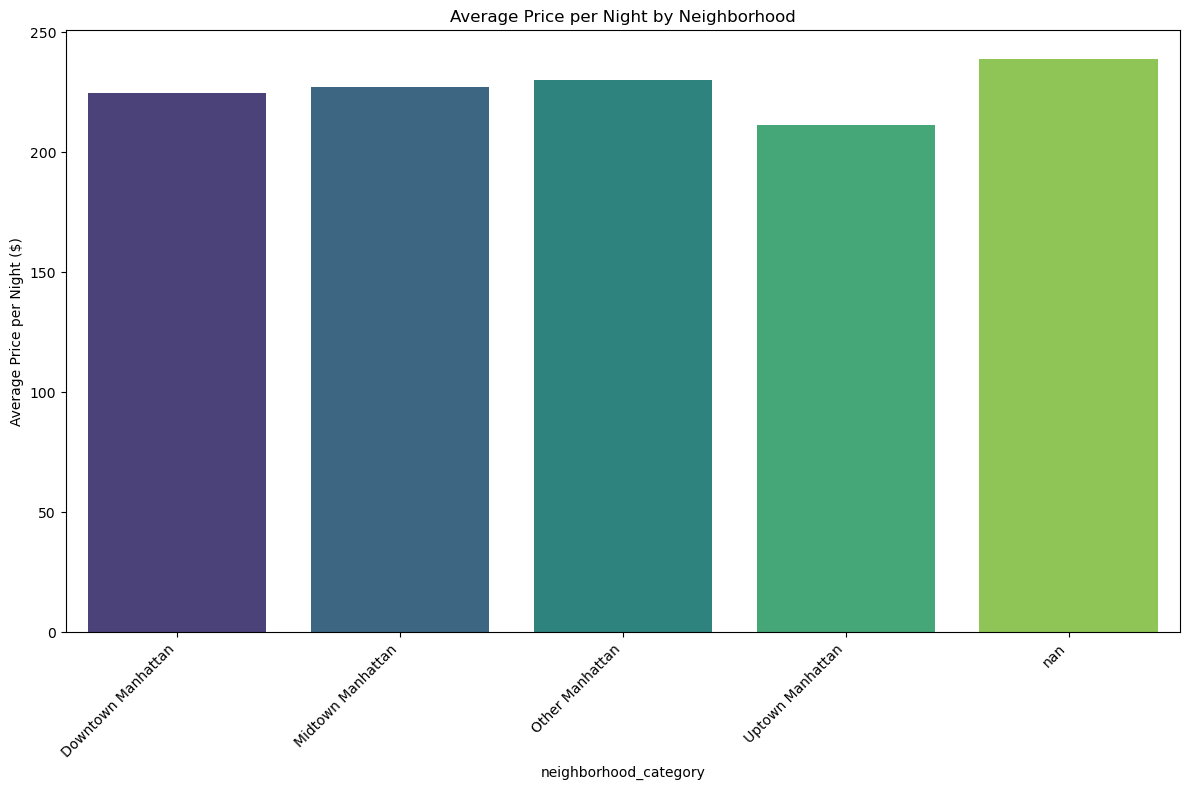

In [104]:
# Check the price_per_night column
print("Sample data from the DataFrame:")
print(expedia_df[['neighborhood_category', 'original_price', 'LOS', 'price_per_night']].head(500))

# Ensure that the necessary columns exist and are in the correct format
expedia_df['price_per_night'] = expedia_df['price_per_night'].astype(float)
expedia_df['neighborhood_category'] = expedia_df['neighborhood_category'].astype(str)

# Calculate the average price per night for each neighborhood
avg_price_per_night = expedia_df.groupby('neighborhood_category')['price_per_night'].mean().reset_index()

# Check the average price per night
print("Average price per night for each neighborhood:")
print(avg_price_per_night)

# Plotting the average price per night for each neighborhood
plt.figure(figsize=(12, 8))
sns.barplot(x='neighborhood_category', y='price_per_night', data=avg_price_per_night, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price per Night by Neighborhood')
plt.xlabel('neighborhood_category')
plt.ylabel('Average Price per Night ($)')
plt.tight_layout()
plt.show()

##Data visualization - the connections between the parameters and the price and between the parameters. We will try to understand if there are strong connections to help us make a decision later

In [105]:
# Inspect the original data types
print("Original Data Types:")
print(expedia_df.dtypes)

# Drop specified columns, ignoring errors if they don't exist
columns_to_drop = ['location_rating', 'price', 'location', 'Limited_rooms', 'index']
df_temp = expedia_df.drop(columns=columns_to_drop, errors='ignore')

# Inspect the data after dropping specific columns
print("\nData Types After Dropping Specified Columns:")
print(df_temp.dtypes)

# Select only numeric columns
numeric_df = df_temp.select_dtypes(include=['float64', 'int64'])

# Check for missing values in numeric columns before dropping NaNs
print("\nMissing Values in Numeric Columns Before Dropping NaNs:")
print(numeric_df.isnull().sum())

# Drop rows with null values in numeric columns
numeric_df = numeric_df.dropna()

# Verify the data types and the content of the dataframe after dropping NaNs
print("\nData Types in Numeric DataFrame After Dropping NaNs:")
print(numeric_df.dtypes)

print("\nFirst Few Rows of Numeric DataFrame After Dropping NaNs:")
print(numeric_df.head())

# Check if we have any numeric columns left after dropping NA values
if numeric_df.empty:
    print("No numeric data available after preprocessing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Display the correlation matrix
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Visualize the strong relationships
    # Identify strong correlations (e.g., correlation coefficient > 0.5 or < -0.5)
    strong_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)].stack().reset_index()
    strong_correlations = strong_correlations[strong_correlations['level_0'] != strong_correlations['level_1']]
    strong_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']

    # Plot the relationships for strong correlations
    for _, row in strong_correlations.iterrows():
        feature1 = row['Feature 1']
        feature2 = row['Feature 2']
        correlation = row['Correlation']

        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=numeric_df, x=feature1, y=feature2)
        plt.title(f'Scatter Plot between {feature1} and {feature2} (Correlation: {correlation:.2f})')
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

    # Specifically visualize the relationship between 'price_per_night' and other parameters
    if 'price_per_night' in numeric_df.columns:
        price_correlations = correlation_matrix['price_per_night'].sort_values(ascending=False)
        print("Price per Night Correlations:")
        print(price_correlations)

        # Plot the relationships for 'price_per_night'
        for feature in price_correlations.index:
            if feature != 'price_per_night':
                plt.figure(figsize=(8, 6))
                sns.lmplot(data=numeric_df, x=feature, y='price_per_night')
                plt.title(f'Scatter Plot between {feature} and price_per_night (Correlation: {price_correlations[feature]:.2f})')
                plt.xlabel(feature)
                plt.ylabel('price_per_night')
                plt.show()
    else:
        print("Column 'price_per_night' not found in the numerical columns.")

Original Data Types:
Snapshot                  object
start_date                object
end_dateIndex            float64
name                      object
TTT                      float64
LOS                      float64
score                    float64
reviews                    int32
price_per_night          float64
original_price           float64
discount_perc            float64
Type of room              object
Free_cancellation         object
No_payment                object
Breakfast                   bool
Option Member             object
end_date                  object
Index                    float64
star_rating              float64
location_rating          float64
neighborhood              object
km_from_center           float64
neighborhood_category     object
dtype: object

Data Types After Dropping Specified Columns:
Snapshot                  object
start_date                object
end_dateIndex            float64
name                      object
TTT                      flo

Data Types in Numeric DataFrame:
end_dateIndex      float64
TTT                float64
LOS                float64
score              float64
reviews              int32
price_per_night    float64
original_price     float64
discount_perc      float64
Index              float64
star_rating        float64
km_from_center     float64
dtype: object

First Few Rows of Numeric DataFrame:
   end_dateIndex  TTT  LOS  score  reviews  price_per_night  original_price  \
0            NaN  1.0  1.0   9.69      505            369.0           419.0   
1            NaN  1.0  1.0   8.48      248            242.0           269.0   
2            NaN  1.0  1.0   8.08     1007            227.0             0.0   
4            NaN  1.0  1.0   8.68     1727            194.0           215.0   
5            NaN  1.0  1.0   8.08     1005            174.0           214.0   

   discount_perc  Index  star_rating  km_from_center  
0      11.933174    0.0          NaN             NaN  
1      10.037175    1.0          

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

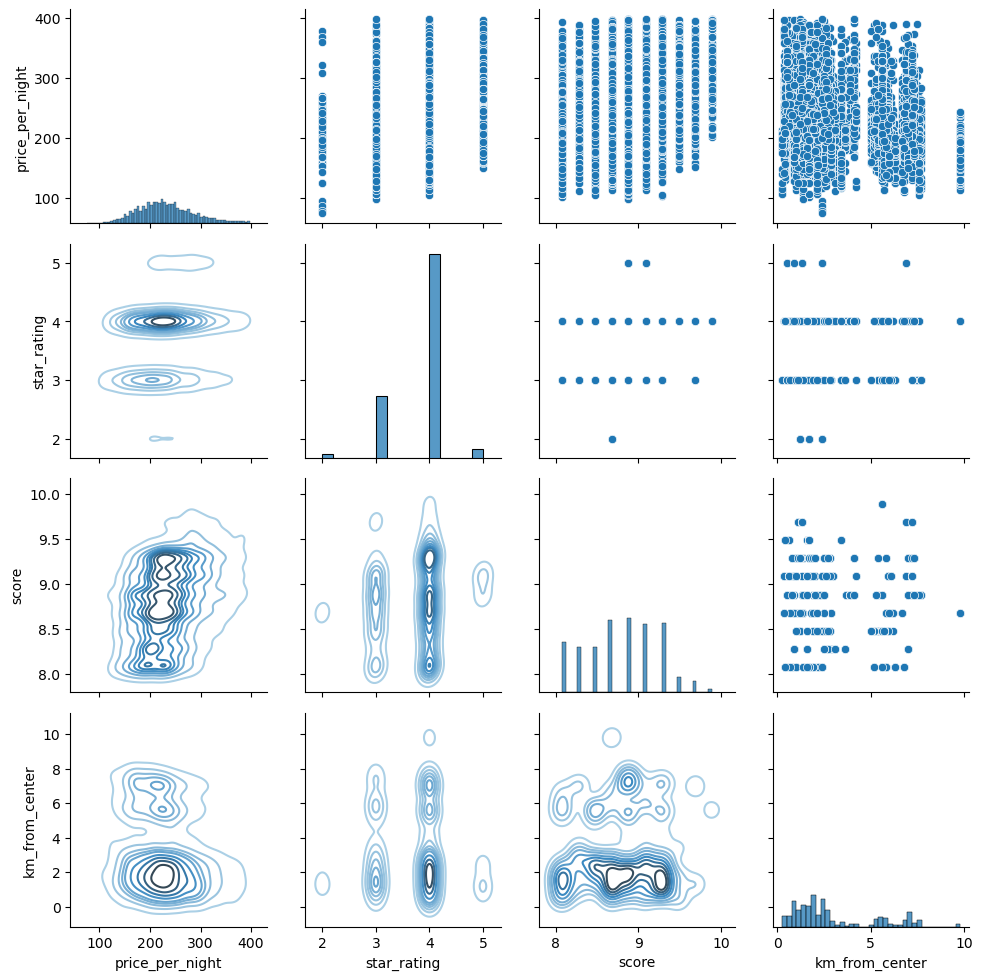

In [106]:
# Drop 'location_rating' and 'price' columns if they exist
df_temp = expedia_df.drop(columns=['location_rating', 'price','location','Limited_rooms','index'], errors='ignore')


# Select only numeric columns
numeric_df = df_temp.select_dtypes(include=[float, int])

# Remove rows with null values in numeric columns
# numeric_df = numeric_df.dropna()

# Verify the data types and the content of the dataframe
print("Data Types in Numeric DataFrame:")
print(numeric_df.dtypes)
print("\nFirst Few Rows of Numeric DataFrame:")
print(numeric_df.head())

# Check if we have any numeric columns left after dropping NA values
if numeric_df.empty:
    print("No numeric data available after preprocessing.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_df.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Create a PairGrid to visualize pairwise relationships
    selected_features = ['price_per_night', 'star_rating', 'score', 'km_from_center']
    g = sns.PairGrid(numeric_df, vars=selected_features)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot, cmap='Blues_d')
    g.map_diag(sns.histplot, kde_kws={'color': 'k'})
    plt.show()

,star_rating,price_per_night
0,2.0,215.196970
1,3.0,213.904330
2,4.0,229.680931
3,5.0,265.415663


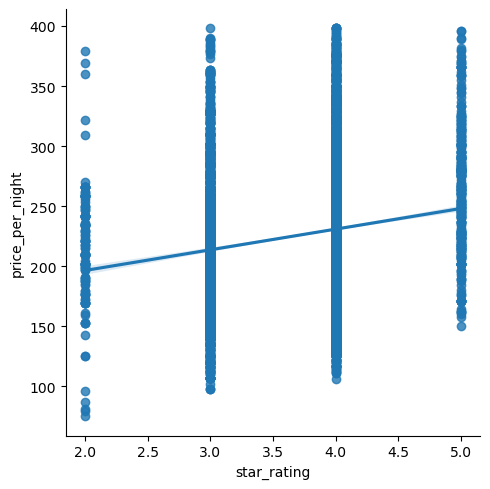

In [107]:
sns.lmplot(x='star_rating',y='price_per_night',data=expedia_df)


# Remove hotels that do not have a star rating
data_filtered = expedia_df.dropna(subset=['star_rating'])

# Group by star_rating and calculate the average price per night
average_prices = data_filtered.groupby('star_rating')['price_per_night'].mean().reset_index()

# Display the results
average_prices

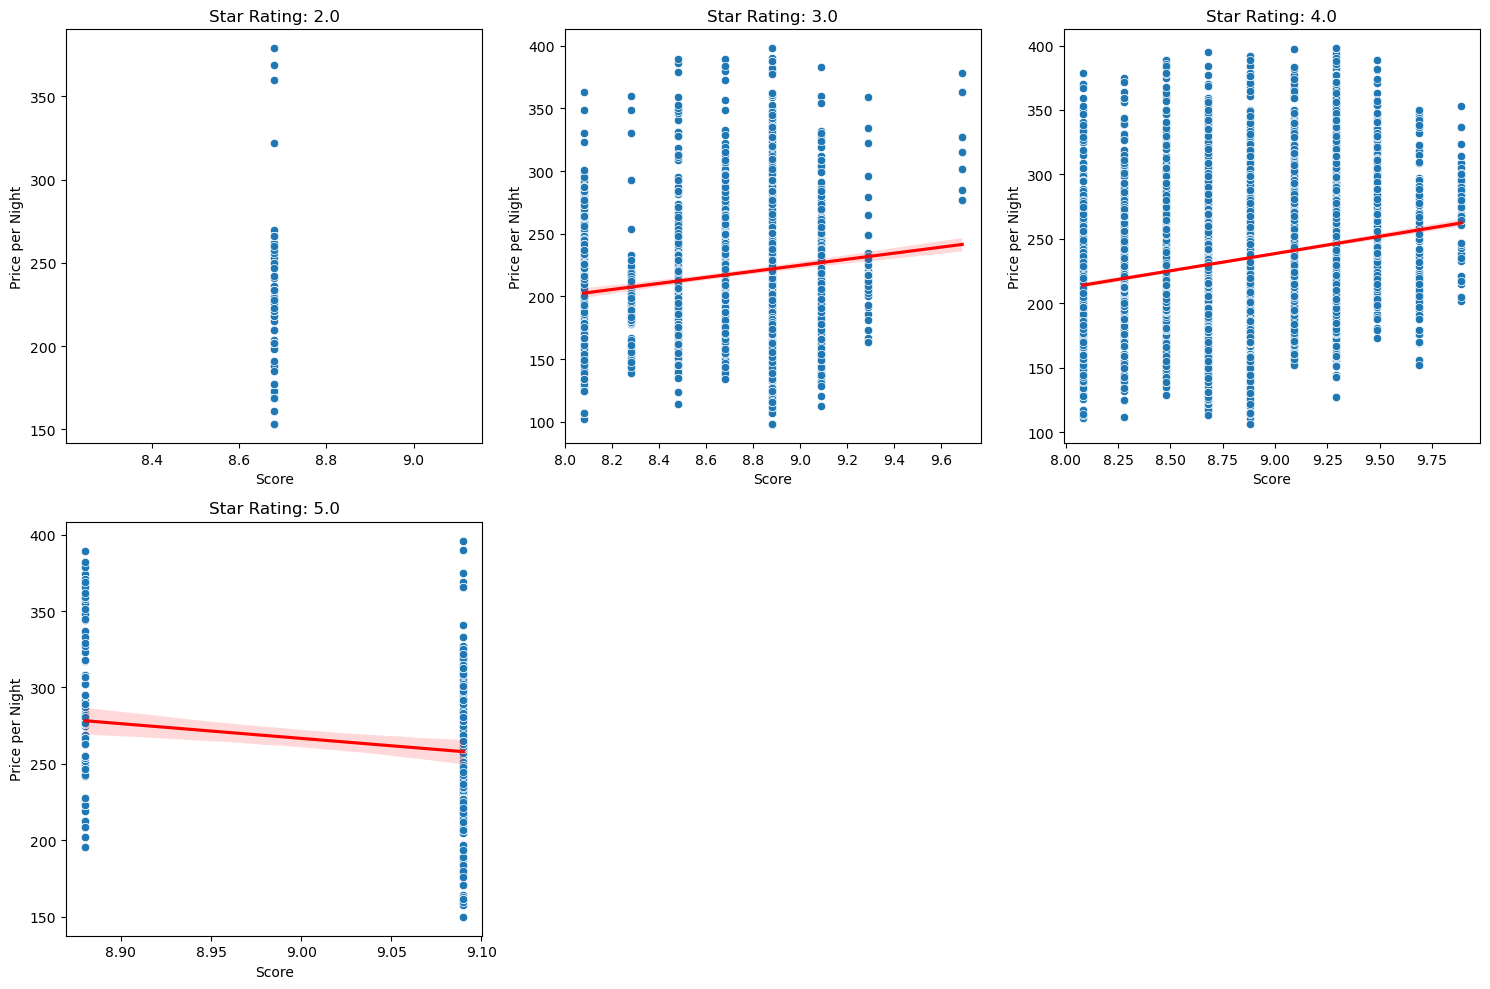

In [108]:
# Filter out hotels without a star rating
data_filtered = expedia_df.dropna(subset=['star_rating'])

# Get unique star ratings
unique_star_ratings = sorted(data_filtered['star_rating'].unique())

# Create subplots with regression lines
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = data_filtered[data_filtered['star_rating'] == star]
    sns.scatterplot(x='score', y='price_per_night', data=star_data)
    sns.regplot(x='score', y='price_per_night', data=star_data, scatter=False, color='red')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Score')
    plt.ylabel('Price per Night')

plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

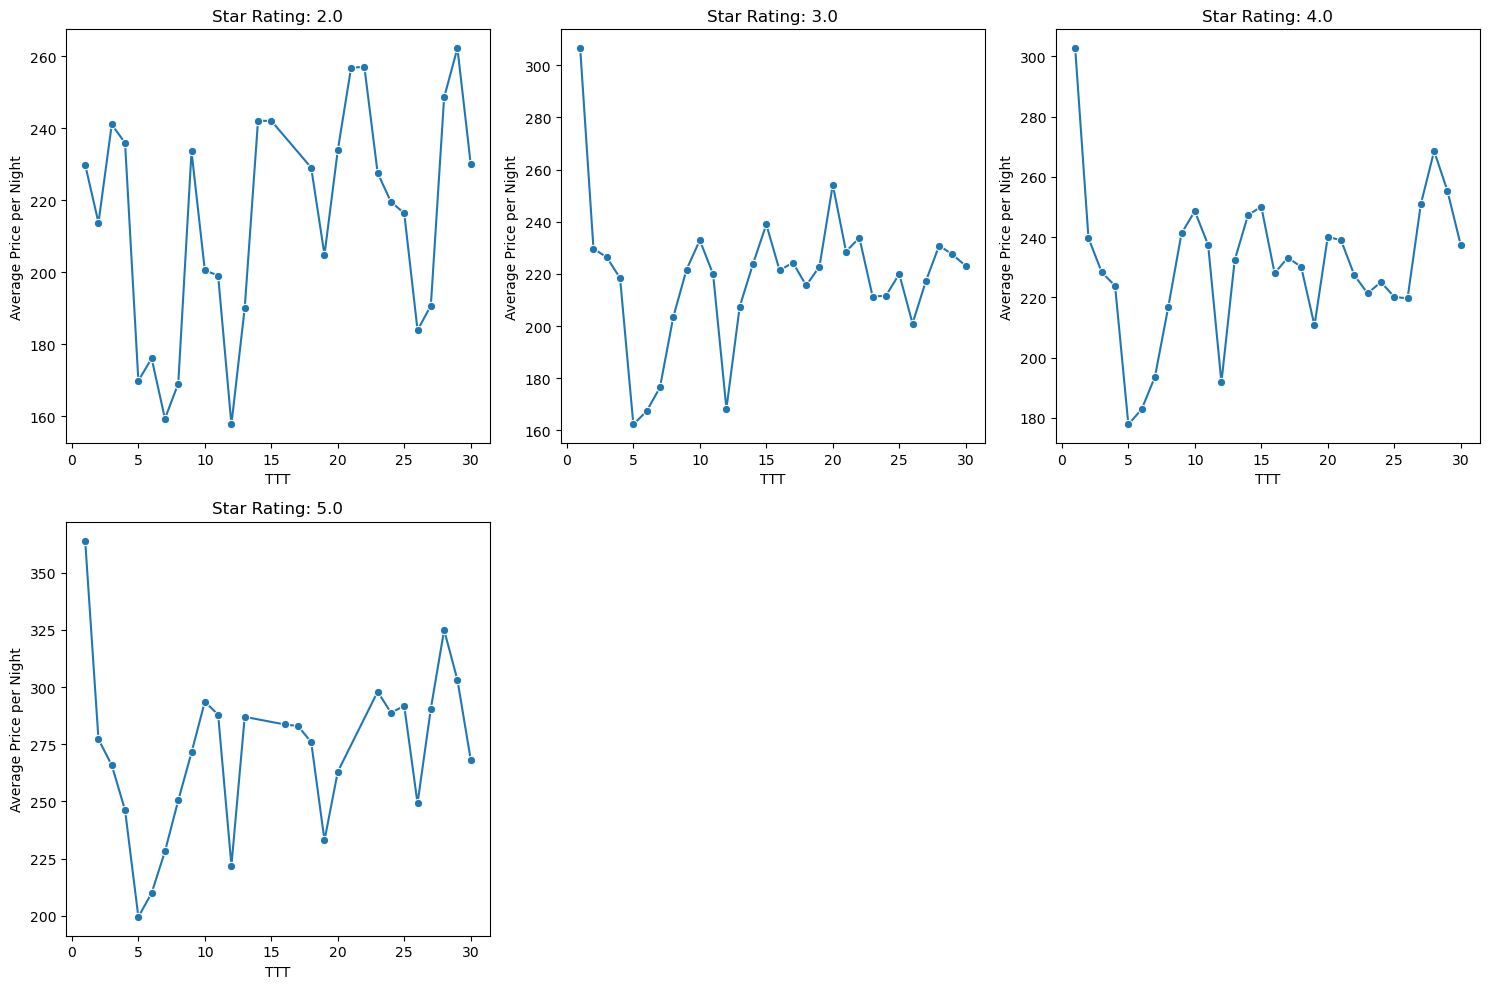

In [109]:
# Remove hotels that do not have a star rating
data_filtered = expedia_df.dropna(subset=['star_rating'])

# Group by star_rating and TTT, then calculate the average price per night
average_prices_ttt = data_filtered.groupby(['star_rating', 'TTT'])['price_per_night'].mean().reset_index()

# Plot the relationship
plt.figure(figsize=(15, 10))

unique_star_ratings = sorted(data_filtered['star_rating'].dropna().unique())

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_ttt[average_prices_ttt['star_rating'] == star]
    sns.lineplot(x='TTT', y='price_per_night', data=star_data, marker='o')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('TTT')
    plt.ylabel('Average Price per Night')

plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

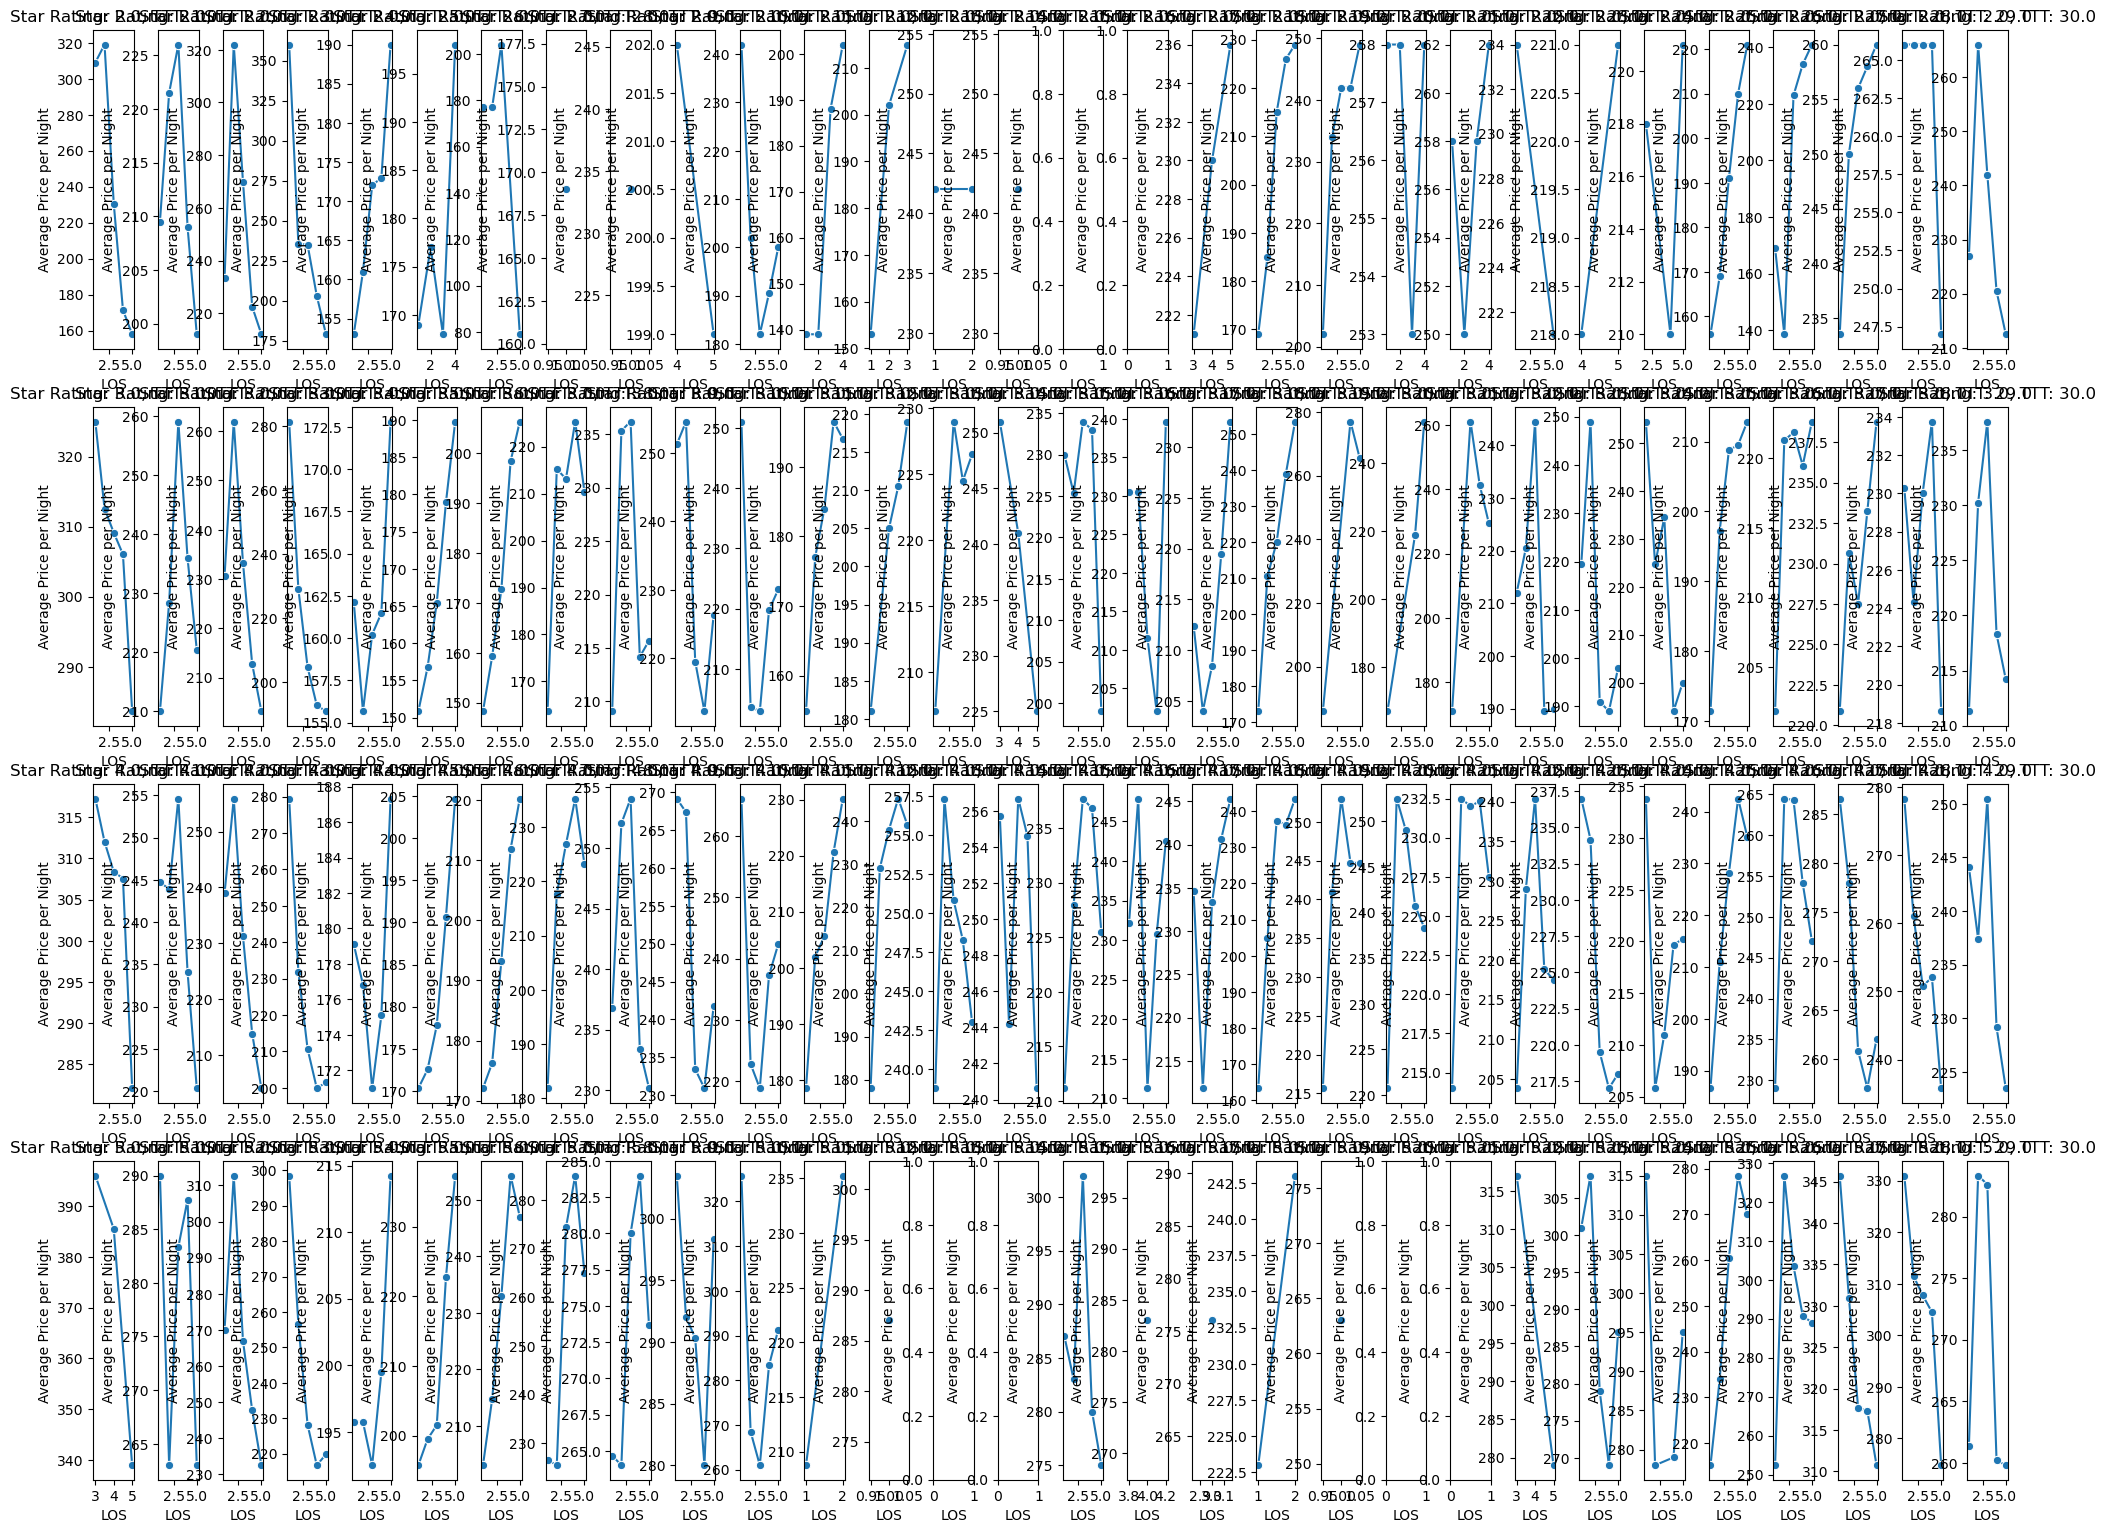

In [110]:
# Remove hotels that do not have a star rating
data_filtered = expedia_df.dropna(subset=['star_rating'])

# Group by star_rating, TTT, and LOS, then calculate the average price per night
average_prices_los = data_filtered.groupby(['star_rating', 'TTT', 'LOS'])['price_per_night'].mean().reset_index()

# Plot the relationship
unique_star_ratings = sorted(data_filtered['star_rating'].dropna().unique())
unique_ttt_values = sorted(data_filtered['TTT'].dropna().unique())

plt.figure(figsize=(20, 15))

for i, star in enumerate(unique_star_ratings, 1):
    for j, ttt in enumerate(unique_ttt_values, 1):
        plt.subplot(len(unique_star_ratings), len(unique_ttt_values), (i-1)*len(unique_ttt_values) + j)
        star_ttt_data = average_prices_los[(average_prices_los['star_rating'] == star) & (average_prices_los['TTT'] == ttt)]
        sns.lineplot(x='LOS', y='price_per_night', data=star_ttt_data, marker='o')
        plt.title(f'Star Rating: {star}, TTT: {ttt}')
        plt.xlabel('LOS')
        plt.ylabel('Average Price per Night')
        plt.tight_layout()

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15700\1594291254.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_checkin = data_filtered.groupby(['star_rating', 'checkin_day_name'])['price_per_night'].mean().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_15700\1594291254.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_checkout = data_filtered.groupby(['star_rating', 'checkout_day_name'])['price_per_night'].mean().reset_index()
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be

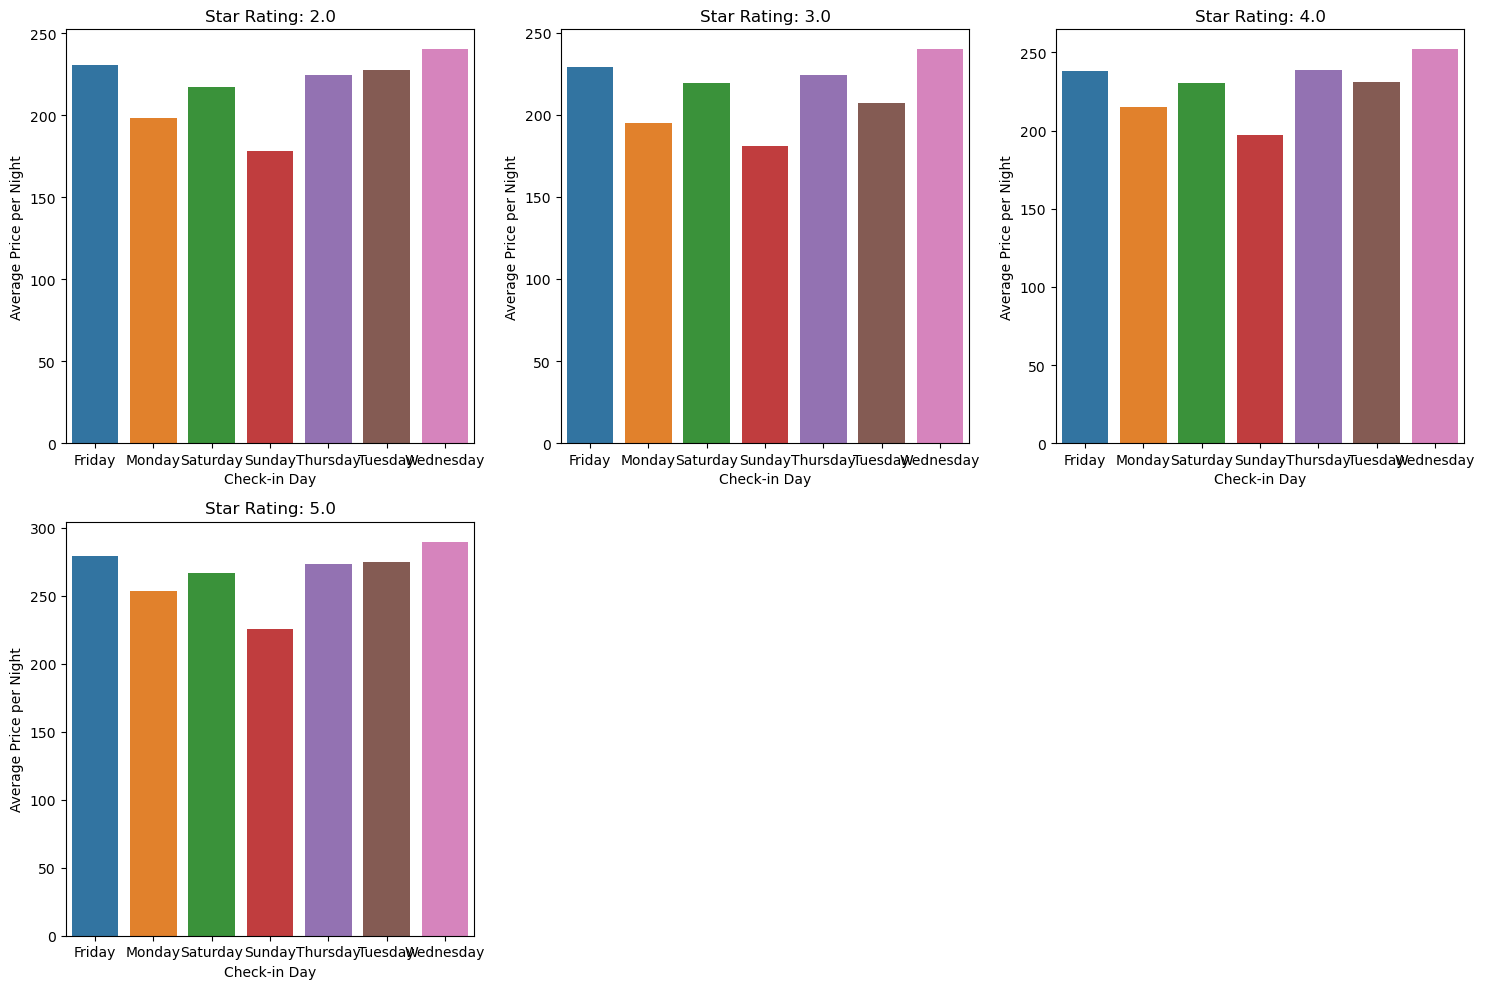

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gr

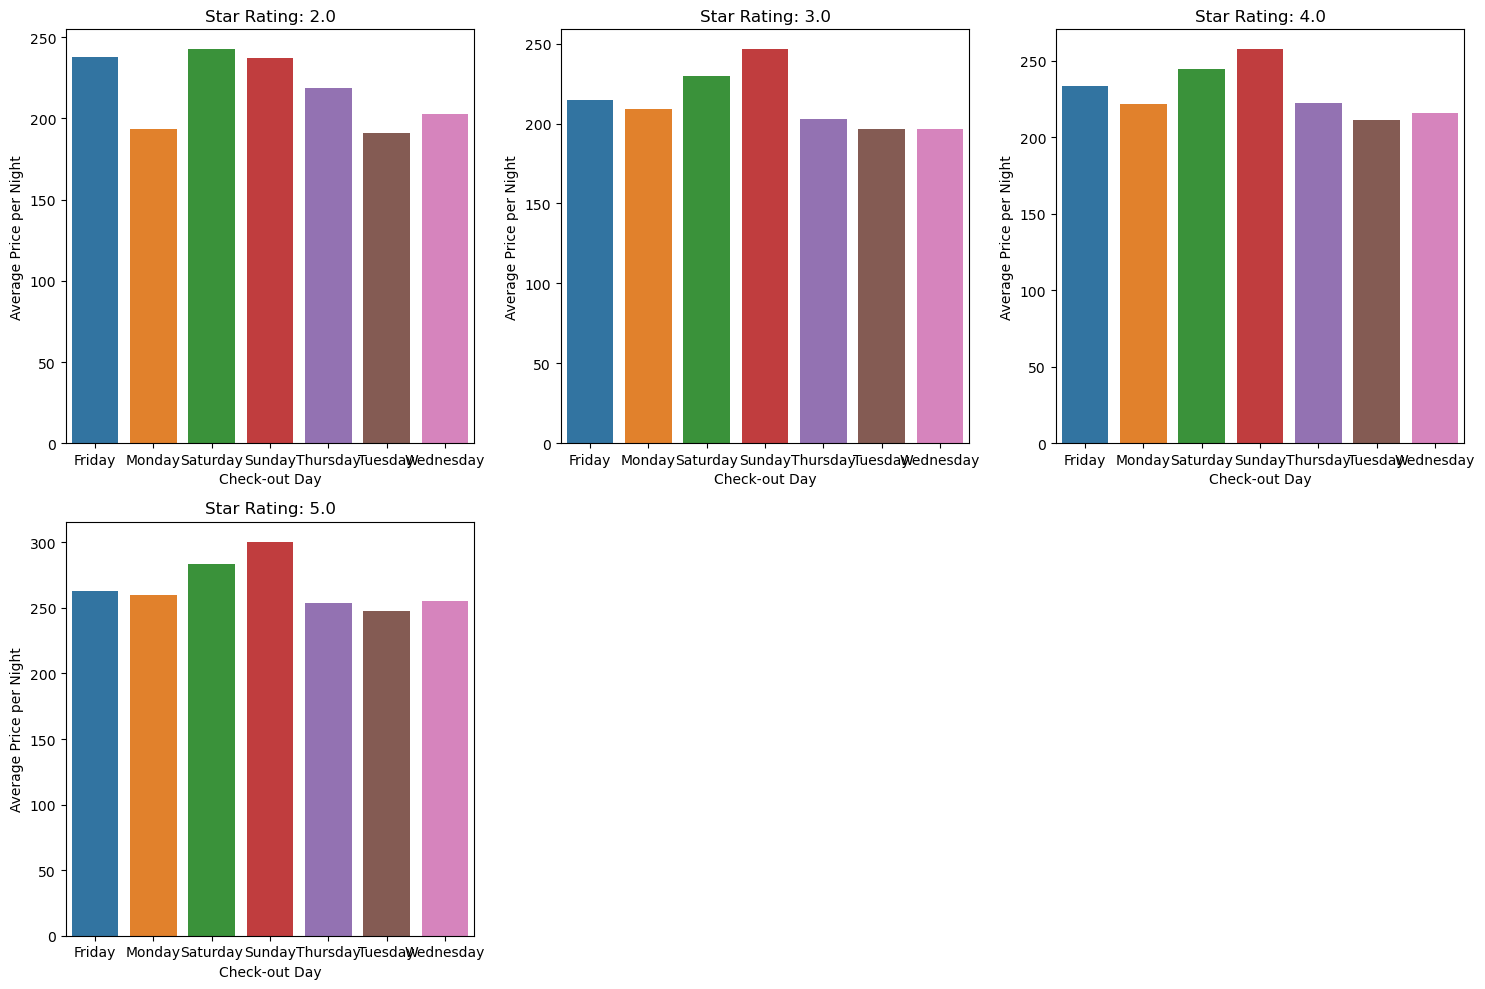

In [111]:
df = expedia_df.copy()
# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')

# Remove hotels that do not have a star rating
data_filtered = df.dropna(subset=['star_rating'])

# Group by star_rating and checkin_day_name, then calculate the average price per night
average_prices_checkin = data_filtered.groupby(['star_rating', 'checkin_day_name'])['price_per_night'].mean().reset_index()

# Group by star_rating and checkout_day_name, then calculate the average price per night
average_prices_checkout = data_filtered.groupby(['star_rating', 'checkout_day_name'])['price_per_night'].mean().reset_index()

# Plot the relationship between check-in day and price per night
plt.figure(figsize=(15, 10))
unique_star_ratings = sorted(data_filtered['star_rating'].dropna().unique())
unique_checkin_days = sorted(df['checkin_day_name'].dropna().unique())

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_checkin[average_prices_checkin['star_rating'] == star]
    sns.barplot(x='checkin_day_name', y='price_per_night', data=star_data, order=unique_checkin_days)
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Check-in Day')
    plt.ylabel('Average Price per Night')

plt.tight_layout()
plt.show()



# Plot the relationship between check-out day and price per night
plt.figure(figsize=(15, 10))
unique_checkout_days = sorted(df['checkout_day_name'].dropna().unique())

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_checkout[average_prices_checkout['star_rating'] == star]
    sns.barplot(x='checkout_day_name', y='price_per_night', data=star_data, order=unique_checkout_days)
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Check-out Day')
    plt.ylabel('Average Price per Night')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15700\4213056400.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_checkin = data_filtered.groupby(['star_rating', 'checkin_day_name'])['price_per_night'].mean().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_15700\4213056400.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_prices_checkout = data_filtered.groupby(['star_rating', 'checkout_day_name'])['price_per_night'].mean().reset_index()
C:\Users\User\AppData\Local\Temp\ipykernel_15700\4213056400.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` fo

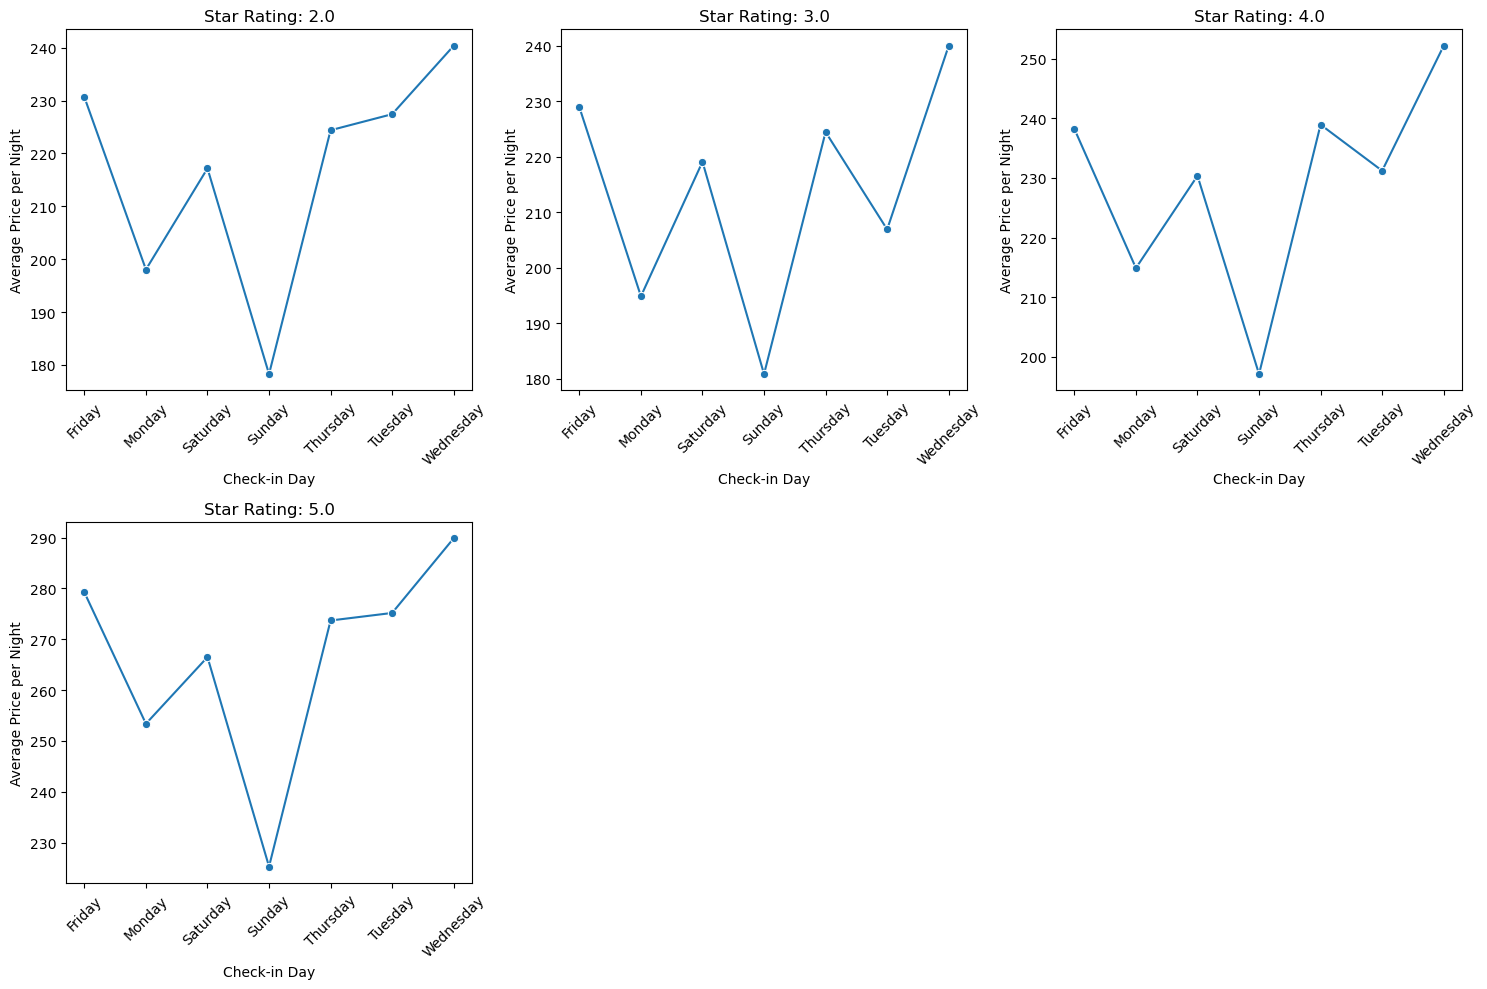

C:\Users\User\AppData\Local\Temp\ipykernel_15700\4213056400.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='checkout_day_name', y='price_per_night', data=star_data, marker='o', ci=None)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Local\Temp\ipykernel_15700\4213056400.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='checkout_day_name', y='price_per_nig

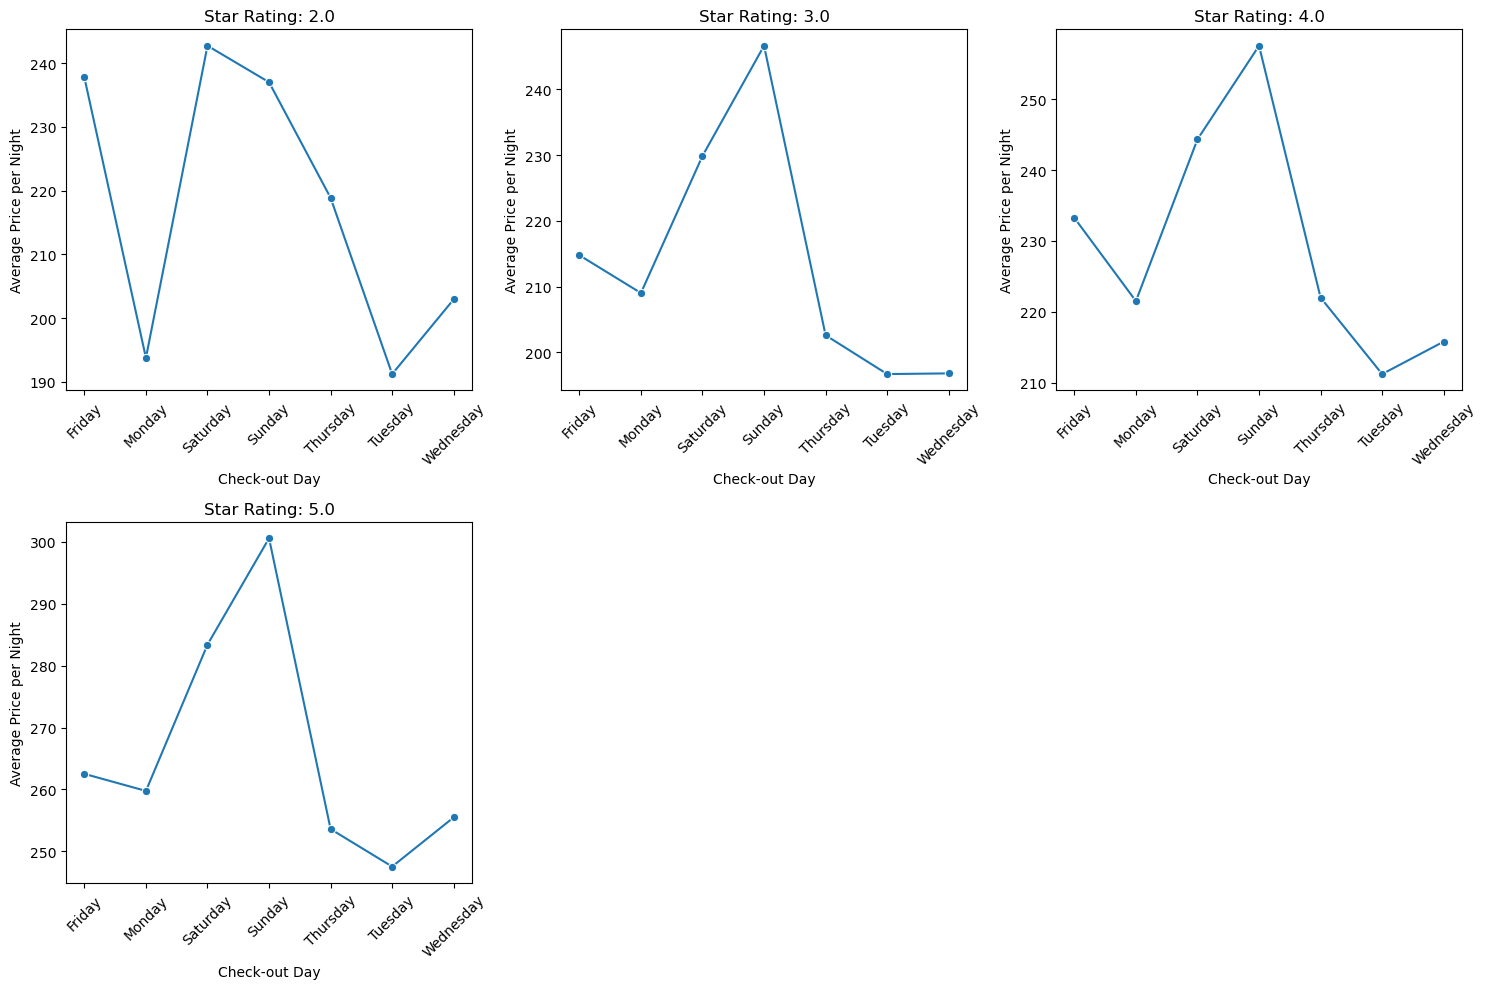

In [112]:
# Load the data
df = expedia_df.copy()

# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')

# Remove hotels that do not have a star rating
data_filtered = df.dropna(subset=['star_rating'])

# Group by star_rating and checkin_day_name, then calculate the average price per night
average_prices_checkin = data_filtered.groupby(['star_rating', 'checkin_day_name'])['price_per_night'].mean().reset_index()

# Group by star_rating and checkout_day_name, then calculate the average price per night
average_prices_checkout = data_filtered.groupby(['star_rating', 'checkout_day_name'])['price_per_night'].mean().reset_index()

# Unique values for plotting
unique_star_ratings = sorted(data_filtered['star_rating'].dropna().unique())
unique_checkin_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
unique_checkout_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the relationship between check-in day and price per night using line plots
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_checkin[average_prices_checkin['star_rating'] == star]
    sns.lineplot(x='checkin_day_name', y='price_per_night', data=star_data, marker='o', ci=None)
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Check-in Day')
    plt.ylabel('Average Price per Night')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot the relationship between check-out day and price per night using line plots
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_checkout[average_prices_checkout['star_rating'] == star]
    sns.lineplot(x='checkout_day_name', y='price_per_night', data=star_data, marker='o', ci=None)
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Check-out Day')
    plt.ylabel('Average Price per Night')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


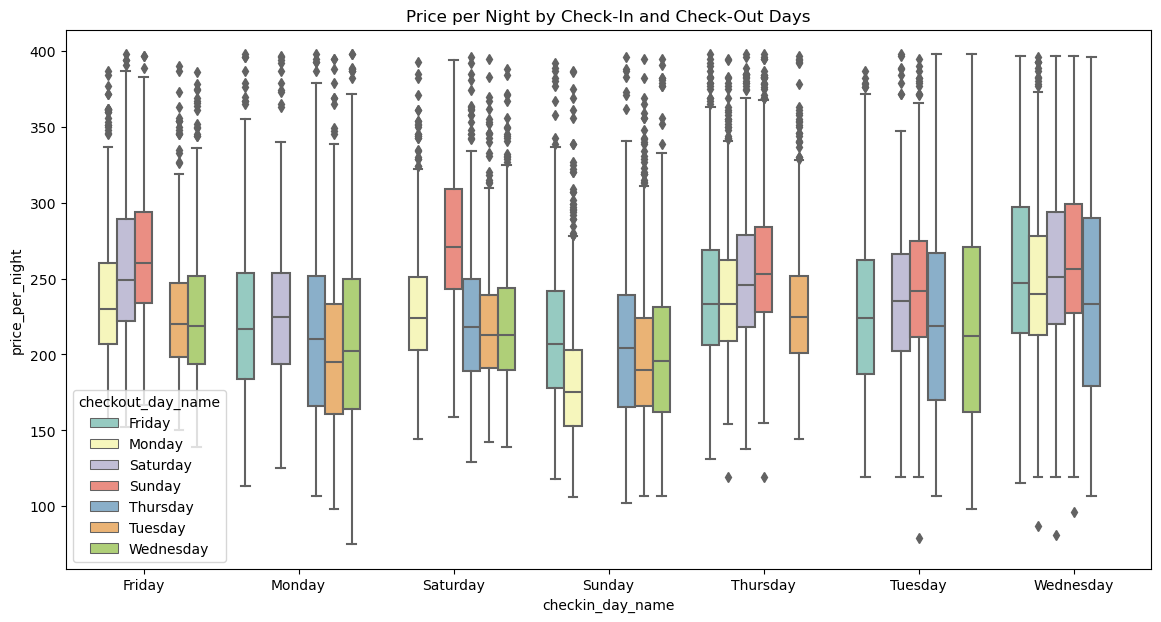

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [113]:
df = expedia_df.copy()


# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')

# Identify and handle outliers in 'price_per_night'
df['price_per_night'] = pd.to_numeric(df['price_per_night'], errors='coerce')

# Remove rows where 'price_per_night' is less than a reasonable minimum price (e.g., $10)
df = df[df['price_per_night'] > 10]

# Visualize the relationship between check-in and check-out days with price per night
plt.figure(figsize=(14, 7))
sns.boxplot(x='checkin_day_name', y='price_per_night', hue='checkout_day_name', data=df, palette='Set3')
plt.title('Price per Night by Check-In and Check-Out Days')
plt.show()

# Prepare data for heatmaps based on star ratings
star_ratings = [1, 2, 3, 4, 5]
heatmap_data = {}
for star in star_ratings:
    heatmap_data[star] = df[df['star_rating'] == star].pivot_table(index='checkin_day_name', columns='checkout_day_name', values='price_per_night', aggfunc='mean')

# Create heatmaps for each star rating with annotations
for star in star_ratings:
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(heatmap_data[star], annot=True, fmt=".1f", cmap='coolwarm', cbar=True)
    plt.title(f'Average Price per Night by Check-In and Check-Out Days for {star}-Star Hotels')
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15700\979850484.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['distance_from_july_4'] = (data_filtered['checkin'] - independence_day).dt.days.abs()
C:\Users\User\AppData\Local\Temp\ipykernel_15700\979850484.py:46: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='distance_from_july_4', y='price_per_night', data=star_data, marker='o', ci=None)
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anacond

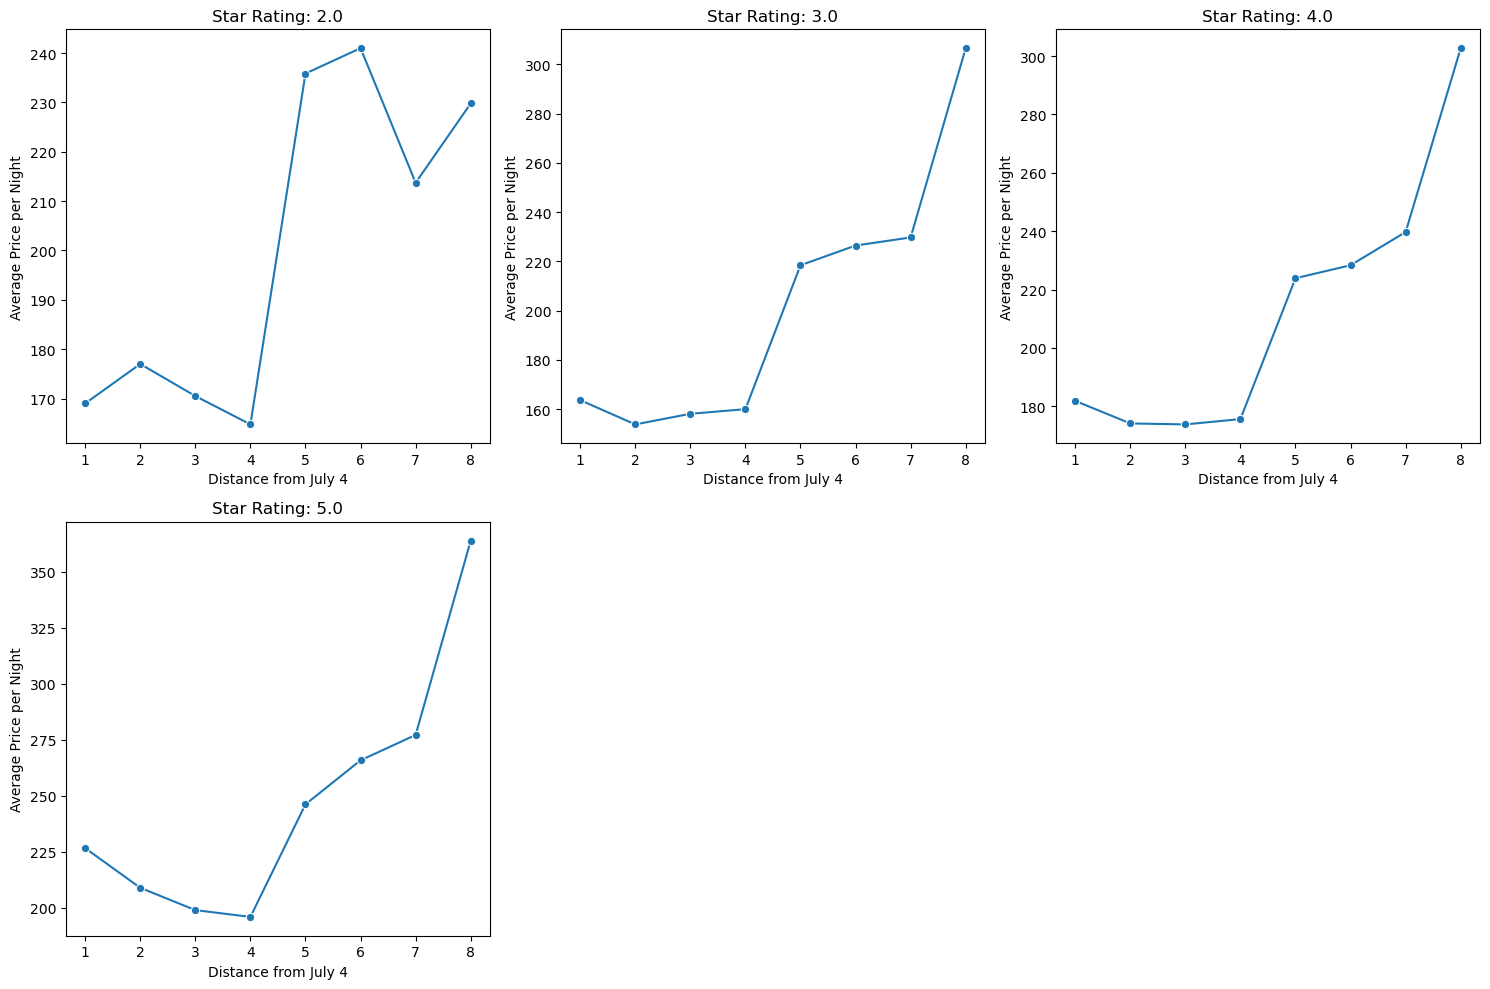

In [114]:
df = expedia_df.copy()

# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')

# Remove hotels that do not have a star rating
data_filtered = df.dropna(subset=['star_rating'])

# Create the 'distance_from_july_4' parameter
independence_day = pd.Timestamp(year=2024, month=7, day=4)
data_filtered['distance_from_july_4'] = (data_filtered['checkin'] - independence_day).dt.days.abs()

# Filter to include only bookings that end no later than July 8
data_filtered = data_filtered[data_filtered['checkout'] <= pd.Timestamp(year=2024, month=7, day=5)]

# Group by star_rating and distance_from_july_4, then calculate the average price per night
average_prices_distance_july4 = data_filtered.groupby(['star_rating', 'distance_from_july_4'])['price_per_night'].mean().reset_index()

# Unique star ratings for plotting
unique_star_ratings = sorted(data_filtered['star_rating'].dropna().unique())

# Plot the relationship between distance from July 4 and price per night using line plots
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_prices_distance_july4[average_prices_distance_july4['star_rating'] == star]
    sns.lineplot(x='distance_from_july_4', y='price_per_night', data=star_data, marker='o', ci=None)
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Distance from July 4')
    plt.ylabel('Average Price per Night')

plt.tight_layout()
plt.show()

In [115]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day of the month for check-in and check-out
df['checkin_day'] = df['checkin'].dt.day
df['checkout_day'] = df['checkout'].dt.day

# Function to determine the period of the month
def determine_period(start_day, end_day):
    avg_day = (start_day + end_day) / 2
    if avg_day < 10:
        return 'beginning of the month'
    elif 10 <= avg_day < 22:
        return 'middle of the month'
    else:
        return 'end of the month'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(lambda row: determine_period(row['checkin_day'], row['checkout_day']), axis=1)

# Perform one-hot encoding for 'checkin_day_name', 'checkout_day_name', and 'period_of_the_month'
checkin_encoder = OneHotEncoder(sparse=False)
encoded_checkin = checkin_encoder.fit_transform(df[['checkin_day_name']])

checkout_encoder = OneHotEncoder(sparse=False)
encoded_checkout = checkout_encoder.fit_transform(df[['checkout_day_name']])

period_encoder = OneHotEncoder(sparse=False)
encoded_period = period_encoder.fit_transform(df[['period_of_the_month']])

# Create DataFrames for the encoded columns
encoded_checkin_df = pd.DataFrame(encoded_checkin, columns=checkin_encoder.get_feature_names_out(['checkin_day_name']))
encoded_checkout_df = pd.DataFrame(encoded_checkout, columns=checkout_encoder.get_feature_names_out(['checkout_day_name']))
encoded_period_df = pd.DataFrame(encoded_period, columns=period_encoder.get_feature_names_out(['period_of_the_month']))

# Drop the original columns and concatenate the new one-hot encoded columns
df = df.drop(columns=['checkin_day_name', 'checkout_day_name', 'period_of_the_month'])
df = df.join(encoded_checkin_df).join(encoded_checkout_df).join(encoded_period_df)

# Save the updated DataFrame to a new CSV file
output_file = './05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv'
df.to_csv(output_file, index=False)

# Display the first few rows of the updated DataFrame
print(df.head())

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                    Snapshot  start_date  end_dateIndex  \
0 2024-06-25 10:55:16.879300  2024-06-26            NaN   
1 2024-06-25 10:55:16.927115  2024-06-26            NaN   
2 2024-06-25 10:55:16.958119  2024-06-26            NaN   
4 2024-06-25 10:55:16.985049  2024-06-26            NaN   
5 2024-06-25 10:55:16.998012  2024-06-26            NaN   

                                           name  TTT  LOS  score  reviews  \
0                            Penny Williamsburg  1.0  1.0   9.69      505   
1  voco Fiorello - LaGuardia East, an IHG Hotel  1.0  1.0   8.48      248   
2                Best Western Queens Gold Coast  1.0  1.0   8.08     1007   
4                                   Radio Hotel  1.0  1.0   8.68     1727   
5                               The Ridge Hotel  1.0  1.0   8.08     1005   

   price_per_night  original_price  ...  checkout_day_name_Friday  \
0            369.0           419.0  ...                       0.0   
1            242.0           269.0  ...     

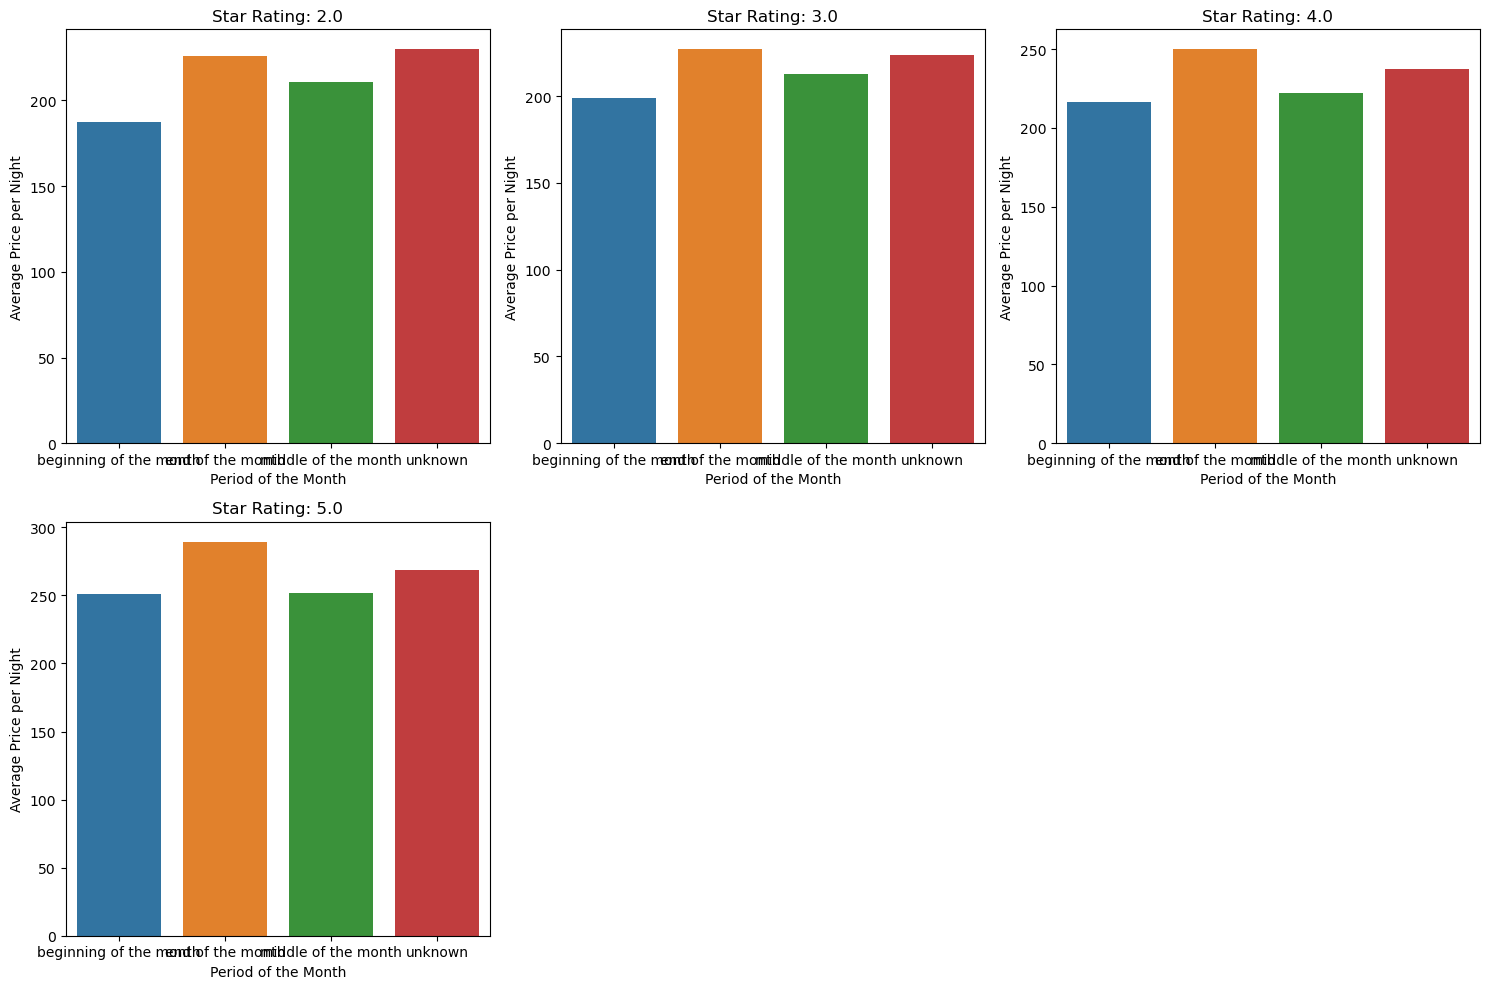

In [116]:
def decode_period(row):
    if row['period_of_the_month_beginning of the month'] == 1.0:
        return 'beginning of the month'
    elif row['period_of_the_month_middle of the month'] == 1.0:
        return 'middle of the month'
    elif row['period_of_the_month_end of the month'] == 1.0:
        return 'end of the month'
    return 'unknown'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(decode_period, axis=1)
average_price_per_period = df.groupby(['star_rating', 'period_of_the_month'])['price_per_night'].mean().reset_index()


# Get unique star ratings
unique_star_ratings = average_price_per_period['star_rating'].unique()

# Create subplots for each star rating
plt.figure(figsize=(15, 10))

for i, star in enumerate(unique_star_ratings, 1):
    plt.subplot(2, 3, i)
    star_data = average_price_per_period[average_price_per_period['star_rating'] == star]
    sns.barplot(data=star_data, x='period_of_the_month', y='price_per_night')
    plt.title(f'Star Rating: {star}')
    plt.xlabel('Period of the Month')
    plt.ylabel('Average Price per Night')

plt.tight_layout()
plt.show()